# 1. Get the data

*Welcome to my global economic metric prediction system where we predict the HDI of a country given a number of features from these countries.*

## 1.1. Download the Dataset

In [1]:
# import all necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import kagglehub

# get the dataset
path = kagglehub.dataset_download("prashantdhanuk/global-country-metrics-2025-hdi-gdp-pop-area")

# Load the latest version
metrics = pd.read_csv(os.path.join(path, 'countries_metric - Sheet1.csv'))

# styling for professional appearance
plt.style.use('default')
sns.set_palette('husl')
sns.set_context('notebook', font_scale=1.1)

## 1.2. Take a look at the Data structure

In [2]:
metrics.head(6)

,country_name,Population (in millions),Nominal Gross Domestic Product (in USD),Nominal GDP Per capita (in USD),GDP Per capita PPP (in USD),Human Development Index (HDI),GINI,AREA (in Sq km)
0,Afghanistan,"41,454,761",$17.329 billion,411,"2,174",0.496,35.20,"652,867"
1,Albania,"2,402,113",$28.372 billion,"10,526","23,404",0.810,33.00,"28,748"
2,Algeria,"46,700,000",$266.78 billion,"5,722","16,483",0.763,27.60,"2,381,741"
3,Andorra,"87,486",$3.897 billion,"44,900","69,146",0.913,40.00,467.63
4,Angola,"39,040,039",$93.796 billion,"2,432",7077,0.616,51.30,"1,246,700"
5,Antigua and Barbuda,"100,772",$2.37 billion,"22,630","31,781",0.851,32.21,440


In [3]:
# See the data types of the features
metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country_name                             194 non-null    object 
 1   Population (in millions)                 194 non-null    object 
 2   Nominal Gross Domestic Product (in USD)  194 non-null    object 
 3   Nominal GDP Per capita (in USD)          194 non-null    object 
 4   GDP Per capita PPP (in USD)              194 non-null    object 
 5   Human Development Index (HDI)            192 non-null    float64
 6   GINI                                     174 non-null    float64
 7   AREA (in Sq km)                          194 non-null    object 
dtypes: float64(2), object(6)
memory usage: 12.3+ KB


## 1.3. Clean the Dataset

In [4]:
# Function to remove string elements and convert to float
def clean_currency(x):
    if isinstance(x, str):
        # Remove dollar sign and commas
        x = x.replace('$', '').replace(',', '').strip()
        # Handle suffixes like billion, million, etc.
        if 'billion' in x.lower():
            return float(x.lower().replace('billion', '').strip()) * 1e9
        elif 'million' in x.lower():
            return float(x.lower().replace('million', '').strip()) * 1e6
        elif 'trillion' in x.lower():
            return float(x.lower().replace('trillion', '').strip()) * 1e12
    return np.nan  # If not a string or not convertible

metrics['Nominal Gross Domestic Product (in USD)'] = metrics['Nominal Gross Domestic Product (in USD)'].apply(clean_currency)
metrics
# Only run this once.

,country_name,Population (in millions),Nominal Gross Domestic Product (in USD),Nominal GDP Per capita (in USD),GDP Per capita PPP (in USD),Human Development Index (HDI),GINI,AREA (in Sq km)
0,Afghanistan,"41,454,761",1.732900e+10,411,"2,174",0.496,35.2,"652,867"
1,Albania,"2,402,113",2.837200e+10,"10,526","23,404",0.810,33.0,"28,748"
2,Algeria,"46,700,000",2.667800e+11,"5,722","16,483",0.763,27.6,"2,381,741"
3,Andorra,"87,486",3.897000e+09,"44,900","69,146",0.913,40.0,467.63
4,Angola,"39,040,039",9.379600e+10,"2,432",7077,0.616,51.3,"1,246,700"
...,...,...,...,...,...,...,...,...
189,Venezuela,"30,518,260",9.221000e+10,"3,474","7,985",0.709,44.8,"916,445"
190,Vietnam,"100,300,000",4.658140e+11,"4,623","15,470",0.766,36.1,"331,344.82"
191,Yemen,"41,385,529",2.104500e+10,617,"2,053",0.470,36.7,"455,503"
192,Zambia,"20,216,029",2.953600e+10,"1,435","4,068",0.595,51.5,"752,617"


In [5]:
# Check if the function works
metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country_name                             194 non-null    object 
 1   Population (in millions)                 194 non-null    object 
 2   Nominal Gross Domestic Product (in USD)  194 non-null    float64
 3   Nominal GDP Per capita (in USD)          194 non-null    object 
 4   GDP Per capita PPP (in USD)              194 non-null    object 
 5   Human Development Index (HDI)            192 non-null    float64
 6   GINI                                     174 non-null    float64
 7   AREA (in Sq km)                          194 non-null    object 
dtypes: float64(3), object(5)
memory usage: 12.3+ KB


In [6]:
# Function to remove all non integer elememts in 'Populaton (In millions)'
def remove_commas(x):
    if isinstance(x, str):
        # Remove commas
        x = x.replace(',', '').strip()
        return x
metrics['Population (in millions)'] = metrics['Population (in millions)'].apply(remove_commas)
# Check if operation works
metrics['Population (in millions)']
# Only run this once!

0       41454761
1        2402113
2       46700000
3          87486
4       39040039
         ...    
189     30518260
190    100300000
191     41385529
192     20216029
193     16868409
Name: Population (in millions), Length: 194, dtype: object

In [7]:
#  Apply the same to 'Nominal GDP Per capita (in USD)', 'AREA (in Sq km)' and 'GDP Per capita PPP (in USD)'
metrics['Nominal GDP Per capita (in USD)'] = metrics['Nominal GDP Per capita (in USD)'].apply(remove_commas)
metrics['AREA (in Sq km)'] = metrics['AREA (in Sq km)'].apply(remove_commas)
metrics['GDP Per capita PPP (in USD)'] = metrics['GDP Per capita PPP (in USD)'].apply(remove_commas)
# Check if operation works
metrics['Nominal GDP Per capita (in USD)']

0        411
1      10526
2       5722
3      44900
4       2432
       ...  
189     3474
190     4623
191      617
192     1435
193     2005
Name: Nominal GDP Per capita (in USD), Length: 194, dtype: object

In [8]:
# Take a quick look at the removals
metrics.head()

,country_name,Population (in millions),Nominal Gross Domestic Product (in USD),Nominal GDP Per capita (in USD),GDP Per capita PPP (in USD),Human Development Index (HDI),GINI,AREA (in Sq km)
0,Afghanistan,41454761,1.732900e+10,411,2174,0.496,35.2,652867
1,Albania,2402113,2.837200e+10,10526,23404,0.810,33.0,28748
2,Algeria,46700000,2.667800e+11,5722,16483,0.763,27.6,2381741
3,Andorra,87486,3.897000e+09,44900,69146,0.913,40.0,467.63
4,Angola,39040039,9.379600e+10,2432,7077,0.616,51.3,1246700


In [9]:
# Now we can convert object data types to float64
def clean_and_convert(x): # Function for conversion
    if isinstance(x, str):
        x = x.replace(',', '').strip()
        try:
            return float(x)
        except ValueError:
            return np.nan
    return x

columns_to_convert = [
    'Population (in millions)',
    'Nominal GDP Per capita (in USD)',
    'GDP Per capita PPP (in USD)',
    'AREA (in Sq km)'
]

for col in columns_to_convert:
    metrics[col] = metrics[col].apply(clean_and_convert)

# Check if operation works
metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country_name                             194 non-null    object 
 1   Population (in millions)                 194 non-null    float64
 2   Nominal Gross Domestic Product (in USD)  194 non-null    float64
 3   Nominal GDP Per capita (in USD)          194 non-null    float64
 4   GDP Per capita PPP (in USD)              194 non-null    float64
 5   Human Development Index (HDI)            192 non-null    float64
 6   GINI                                     174 non-null    float64
 7   AREA (in Sq km)                          194 non-null    float64
dtypes: float64(7), object(1)
memory usage: 12.3+ KB


In [10]:
# Take a quick look at the conversions
metrics.head()

,country_name,Population (in millions),Nominal Gross Domestic Product (in USD),Nominal GDP Per capita (in USD),GDP Per capita PPP (in USD),Human Development Index (HDI),GINI,AREA (in Sq km)
0,Afghanistan,41454761.0,1.732900e+10,411.0,2174.0,0.496,35.2,652867.00
1,Albania,2402113.0,2.837200e+10,10526.0,23404.0,0.810,33.0,28748.00
2,Algeria,46700000.0,2.667800e+11,5722.0,16483.0,0.763,27.6,2381741.00
3,Andorra,87486.0,3.897000e+09,44900.0,69146.0,0.913,40.0,467.63
4,Angola,39040039.0,9.379600e+10,2432.0,7077.0,0.616,51.3,1246700.00


In [11]:
metrics.describe()

,Population (in millions),Nominal Gross Domestic Product (in USD),Nominal GDP Per capita (in USD),GDP Per capita PPP (in USD),Human Development Index (HDI),GINI,AREA (in Sq km)
count,1.940000e+02,1.940000e+02,194.000000,194.000000,192.000000,174.000000,1.940000e+02
mean,4.011249e+07,5.790842e+11,19583.315412,29442.831186,0.736099,36.450920,6.587646e+05
std,1.486475e+08,2.660255e+12,31118.524974,30740.448938,0.159465,7.875269,1.818097e+06
min,8.820000e+02,2.120000e+07,326.000000,934.000000,0.000000,16.600000,4.900000e-01
25%,1.838091e+06,1.268525e+10,2520.250000,5990.500000,0.623500,30.712500,2.375900e+04
50%,9.084939e+06,4.456900e+10,7402.000000,18713.500000,0.755000,35.350000,1.202690e+05
75%,3.140560e+07,2.672060e+11,23916.750000,45103.500000,0.859000,40.975000,5.113375e+05
max,1.428628e+09,3.050700e+13,240862.000000,156755.000000,0.972000,63.000000,1.709825e+07


*Now, lets visualize the data to get some insight on what we are working with.*

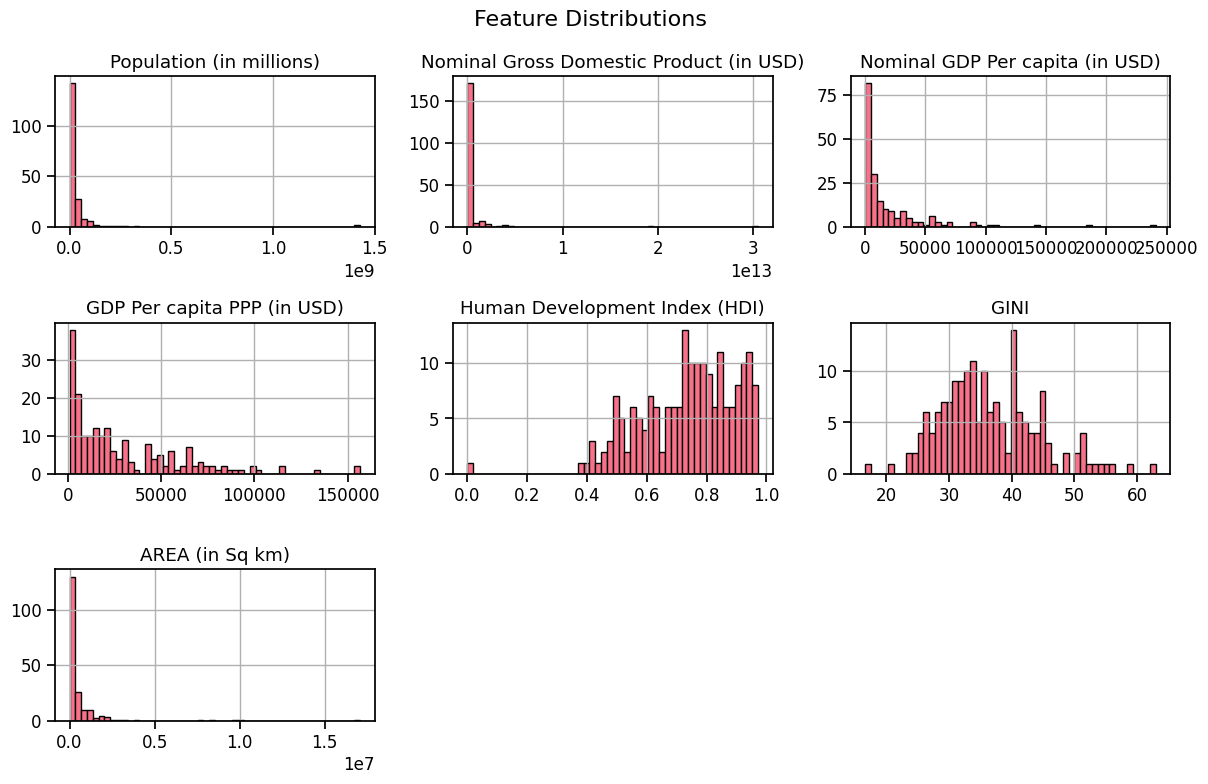

In [12]:
metrics.hist(bins=50, figsize=(12, 8), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

## 1.4 Create a Test Set

In [13]:
# Import the split function
from sklearn.model_selection import train_test_split

# Split to Test and Train set
train_set, test_set = train_test_split( 
    metrics, test_size=0.2, random_state=42
)

In [14]:
# Check the Split
train_set.head()

,country_name,Population (in millions),Nominal Gross Domestic Product (in USD),Nominal GDP Per capita (in USD),GDP Per capita PPP (in USD),Human Development Index (HDI),GINI,AREA (in Sq km)
5,Antigua and Barbuda,100772.0,2.370000e+09,22630.0,31781.0,0.851,32.21,440.0
135,peru,34352720.0,3.033000e+11,8814.0,18689.0,0.794,40.20,1285216.0
122,Nicaragua,6676948.0,1.784300e+10,2673.0,8492.0,0.706,46.20,130375.0
167,Switzerland,9060598.0,9.471250e+11,104896.0,97581.0,0.970,31.50,41285.0
85,Kazakhstan,20286084.0,2.967400e+11,14778.0,43610.0,0.837,27.80,2724900.0


In [15]:
# Drop the 'country_name' column
train_set.drop('country_name', axis=1, inplace = True)
test_set.drop('country_name', axis=1, inplace = True)

In [16]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 5 to 102
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Population (in millions)                 155 non-null    float64
 1   Nominal Gross Domestic Product (in USD)  155 non-null    float64
 2   Nominal GDP Per capita (in USD)          155 non-null    float64
 3   GDP Per capita PPP (in USD)              155 non-null    float64
 4   Human Development Index (HDI)            154 non-null    float64
 5   GINI                                     140 non-null    float64
 6   AREA (in Sq km)                          155 non-null    float64
dtypes: float64(7)
memory usage: 9.7 KB


# 2. Exploratory Data Analysis (EDA)

In [17]:
# Set a copy of the train split for visualization.
metrics_copy = train_set.copy()

In [18]:
# Mapping of old column names to new short names
rename_map = {
    'Human Development Index (HDI)': 'HDI',
    'Nominal GDP Per capita (in USD)': 'NomGDP_PC',
    'GDP Per capita PPP (in USD)': 'PPP_GDP',
    'GINI': 'GINI',  # Already short, no change needed
    'AREA (in Sq km)': 'Area',
    'Population (in millions)': 'Population',
    'Nominal Gross Domestic Product (in USD)':'NomGDP'
}

# Apply the rename
metrics_copy.rename(columns=rename_map, inplace=True)
metrics_copy.head()

,Population,NomGDP,NomGDP_PC,PPP_GDP,HDI,GINI,Area
5,100772.0,2.370000e+09,22630.0,31781.0,0.851,32.21,440.0
135,34352720.0,3.033000e+11,8814.0,18689.0,0.794,40.20,1285216.0
122,6676948.0,1.784300e+10,2673.0,8492.0,0.706,46.20,130375.0
167,9060598.0,9.471250e+11,104896.0,97581.0,0.970,31.50,41285.0
85,20286084.0,2.967400e+11,14778.0,43610.0,0.837,27.80,2724900.0


## 2.1. Visualizing the Data

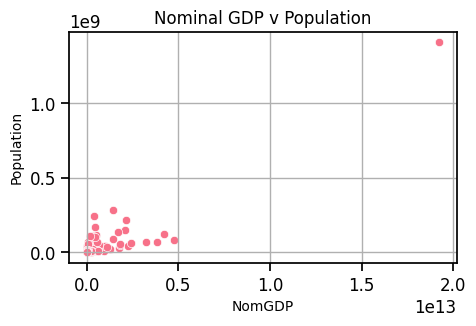

In [19]:
# Plot Nominal GDP againt Population 
plt.figure(figsize=(5,3))
sns.scatterplot(
    data = metrics_copy, 
    x = 'NomGDP',
    y = 'Population',
    sizes = (20,200),
    alpha = 1.0,
)
plt.title('Nominal GDP v Population', fontsize=12)
plt.xlabel('NomGDP', fontsize=10)
plt.ylabel('Population', fontsize=10)
plt.grid(True)
plt.show()

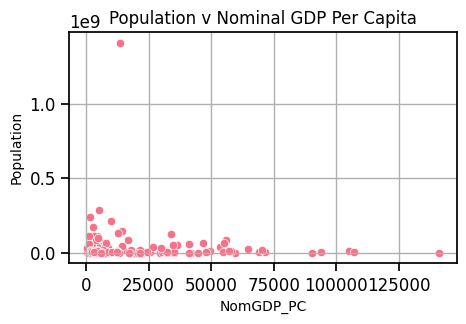

In [20]:
# Plot Nominal GDP Per Capita againt Population 
plt.figure(figsize=(5,3))
sns.scatterplot(
    data=metrics_copy, 
    x='NomGDP_PC',
    y='Population',
    sizes=(20,200),
    alpha=1.0,
)
plt.title('Population v Nominal GDP Per Capita', fontsize=12)
plt.xlabel('NomGDP_PC', fontsize=10)
plt.ylabel('Population', fontsize=10)
plt.grid(True)
plt.show()

## 2.2. Looking for Correlations

In [21]:
# Compute correlation with HDI
corr_matrix = metrics_copy.corr()
corr_matrix['HDI'].sort_values(ascending = False)

HDI           1.000000
PPP_GDP       0.775168
NomGDP_PC     0.703772
NomGDP        0.210676
Area          0.094616
Population    0.013943
GINI         -0.360057
Name: HDI, dtype: float64

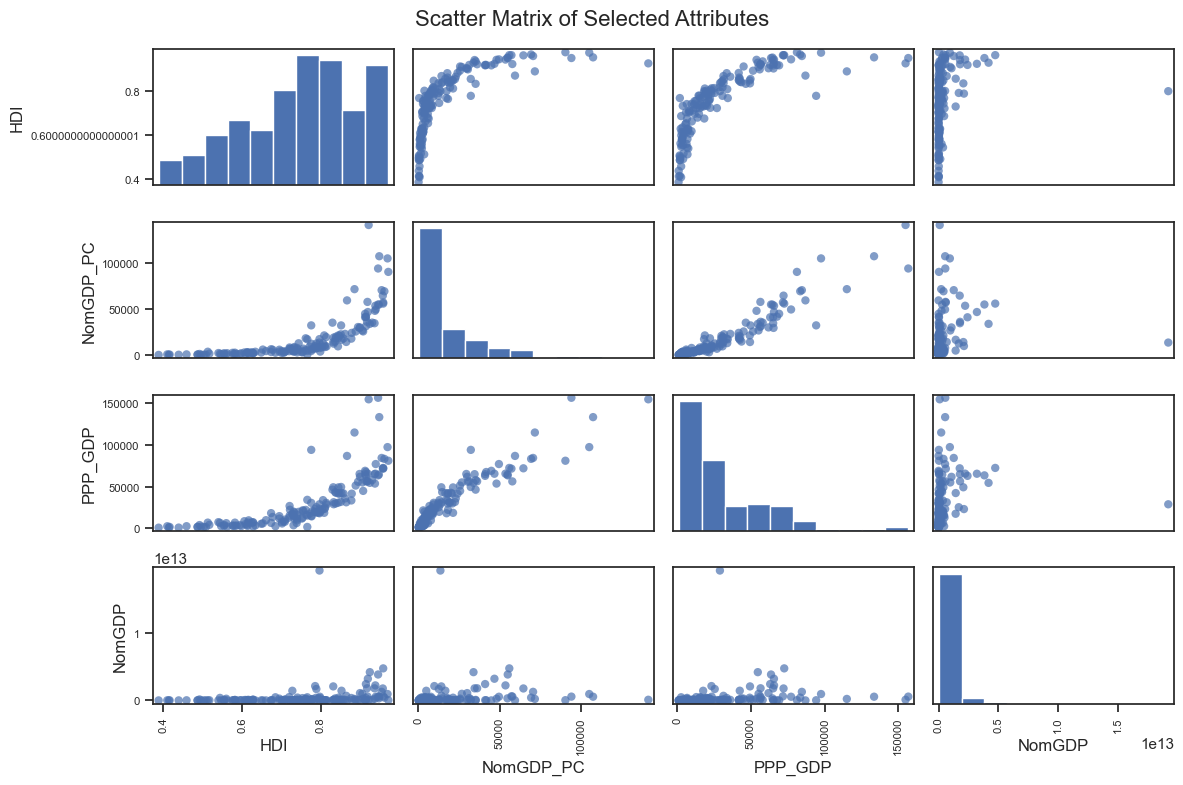

In [22]:
# Visualize the correlation of every feature with every other feature
from pandas.plotting import scatter_matrix
attributes = ['HDI', 
              'NomGDP_PC', 
              'PPP_GDP',
              'NomGDP'
              ]
sns.set(style='ticks')

scatter_matrix(
    metrics_copy[attributes],
    figsize=(12,8),
    diagonal="hist",      # or 'kde' for density plots on diagonal
    marker='o',
    alpha=0.7,
    color=sns.color_palette('deep')[0]# set True to skip upper triangle
)

plt.suptitle("Scatter Matrix of Selected Attributes", fontsize=16)
plt.tight_layout()        # improve spacing
plt.show()

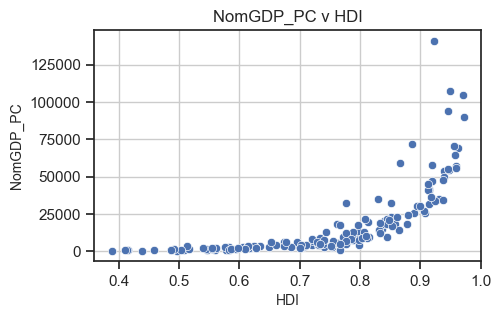

In [23]:
plt.figure(figsize=(5,3))

sns.scatterplot(
    data=metrics_copy,
    x = 'HDI',
    y='NomGDP_PC'
)

plt.title('NomGDP_PC v HDI', fontsize=12)
plt.xlabel('HDI', fontsize=10)
plt.ylabel('NomGDP_PC', fontsize=10)
plt.grid(True)
plt.show()

## 2.3. Experimenting with Attribute Combinations

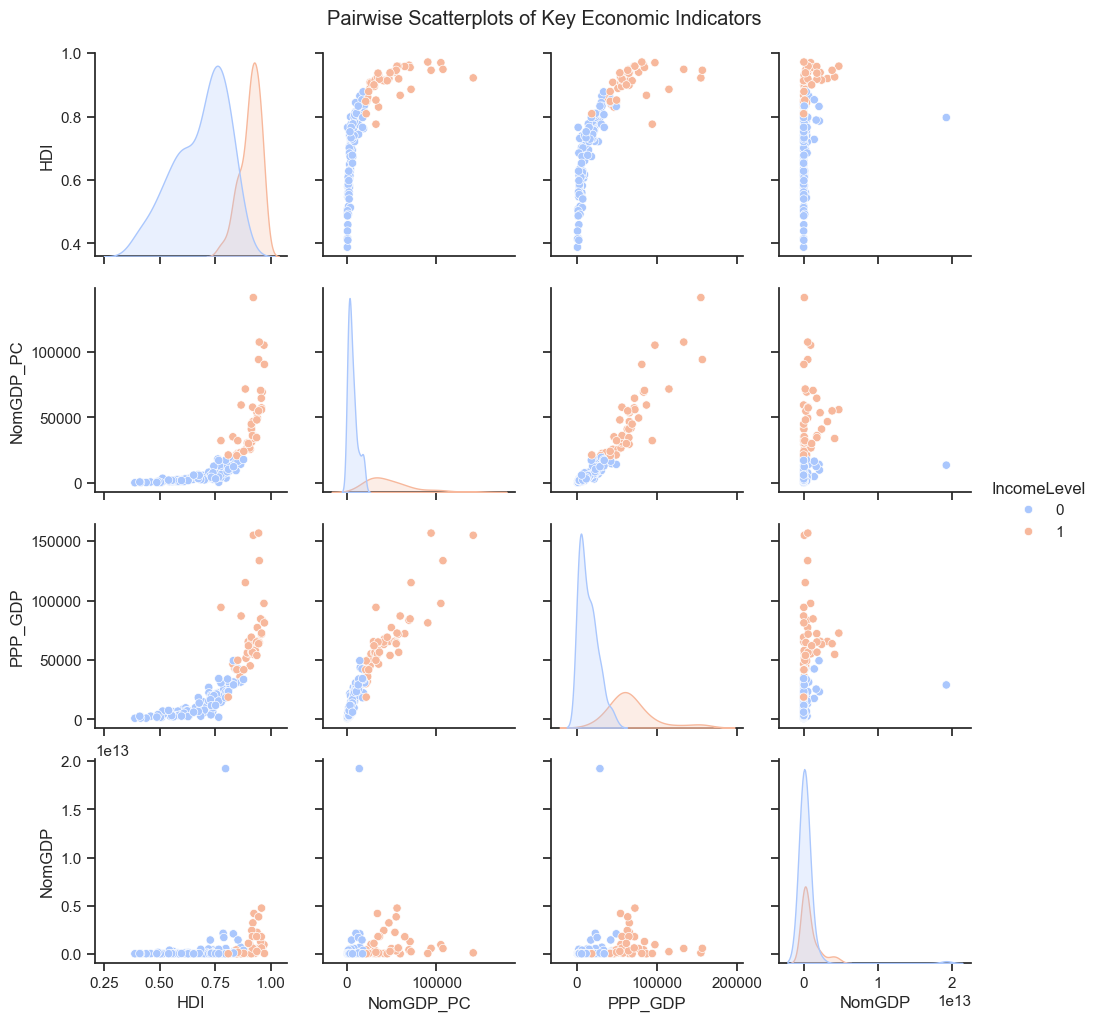

In [24]:
# Create Income Level (1 for High, and 0 for Low)
metrics_copy['IncomeLevel'] = metrics_copy['NomGDP_PC'].apply(
    lambda x: 1 if x > 20000 else 0)

sns.pairplot(metrics_copy[attributes + ['IncomeLevel']],
             hue='IncomeLevel',
             diag_kind='kde',
             palette='coolwarm')

plt.suptitle('Pairwise Scatterplots of Key Economic Indicators', y = 1.02)
plt.show()

In [25]:
corr_matrix = metrics_copy.corr()
corr_matrix['HDI'].sort_values(ascending = False)

HDI            1.000000
PPP_GDP        0.775168
NomGDP_PC      0.703772
IncomeLevel    0.694334
NomGDP         0.210676
Area           0.094616
Population     0.013943
GINI          -0.360057
Name: HDI, dtype: float64

# 3. Prepare the Data for Machine Learning Algorithms

*Let's revert to the original training set and separate the target*

In [120]:
metrics = train_set.drop('Human Development Index (HDI)', axis=1)
metrics_labels = train_set['Human Development Index (HDI)'].copy()

## 3.1. Data Cleaning

*For handling missing features, we will execute three options: 
A. Get rid of the corresponding countries.
B. Get rid of the whole attribute.
C. Imputation: Set the missing values to some value (zero, the mean, the median, etc.).*

In [27]:
# Get the countries with null attributes
null_rows = metrics.isnull().any(axis=1)
metrics.loc[null_rows].head()

,Population (in millions),Nominal Gross Domestic Product (in USD),Nominal GDP Per capita (in USD),GDP Per capita PPP (in USD),GINI,AREA (in Sq km)
95,7361263.0,4.822000e+10,6987.0,26928.0,NaN,1759541.00
165,632638.0,4.506000e+09,6858.0,22439.0,NaN,163820.00
12,1463265.0,4.780000e+10,29573.0,65345.0,NaN,786.80
145,110872.0,1.000000e+09,9360.0,17840.0,NaN,389.00
147,34042.0,2.034000e+09,59405.0,86989.0,NaN,61.19


In [28]:
# Option A: Get rid of the corresponding countries.
metrics_optionA = metrics.copy()

metrics_optionA.dropna(subset=['GINI'], inplace=True)

metrics_optionA.loc[null_rows].head()

,Population (in millions),Nominal Gross Domestic Product (in USD),Nominal GDP Per capita (in USD),GDP Per capita PPP (in USD),GINI,AREA (in Sq km)


In [29]:
# Option B: Get rid of the whole attribute.
metrics_optionB = metrics.copy()

metrics_optionB.drop('GINI', axis=1, inplace=True)

metrics_optionB.loc[null_rows].head()

,Population (in millions),Nominal Gross Domestic Product (in USD),Nominal GDP Per capita (in USD),GDP Per capita PPP (in USD),AREA (in Sq km)
95,7361263.0,4.822000e+10,6987.0,26928.0,1759541.00
165,632638.0,4.506000e+09,6858.0,22439.0,163820.00
12,1463265.0,4.780000e+10,29573.0,65345.0,786.80
145,110872.0,1.000000e+09,9360.0,17840.0,389.00
147,34042.0,2.034000e+09,59405.0,86989.0,61.19


In [30]:
# Option C: Imputation
metrics_optionC = metrics.copy()

median = metrics['GINI'].median()
metrics_optionC['GINI'].fillna(median, inplace=True)

metrics_optionC.loc[null_rows].head()

C:\Users\Talha\AppData\Local\Temp\ipykernel_20320\3249969874.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  metrics_optionC['GINI'].fillna(median, inplace=True)


,Population (in millions),Nominal Gross Domestic Product (in USD),Nominal GDP Per capita (in USD),GDP Per capita PPP (in USD),GINI,AREA (in Sq km)
95,7361263.0,4.822000e+10,6987.0,26928.0,35.85,1759541.00
165,632638.0,4.506000e+09,6858.0,22439.0,35.85,163820.00
12,1463265.0,4.780000e+10,29573.0,65345.0,35.85,786.80
145,110872.0,1.000000e+09,9360.0,17840.0,35.85,389.00
147,34042.0,2.034000e+09,59405.0,86989.0,35.85,61.19


The SimpleImputer will store the median value of each feature: this will
 make it possible to impute missing values not only on the training set, but
 also on the validation set, the test set, and any new data fed to the model.

In [31]:
# Using The Imputer class as a better alternative to option C.
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [32]:
metrics_num = metrics.select_dtypes(include=[np.number])
imputer.fit(metrics_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [33]:
imputer.statistics_

array([9.060598e+06, 5.239000e+10, 7.812000e+03, 1.967800e+04,
       3.585000e+01, 1.303750e+05])

In [34]:
# Check that this is the same as manually computing the median of each attribute:
metrics_num.median().values

array([9.060598e+06, 5.239000e+10, 7.812000e+03, 1.967800e+04,
       3.585000e+01, 1.303750e+05])

Transform the training set:

In [35]:
X = imputer.transform(metrics_num)

In [36]:
imputer.feature_names_in_

array(['Population (in millions)',
       'Nominal Gross Domestic Product (in USD)',
       'Nominal GDP Per capita (in USD)', 'GDP Per capita PPP (in USD)',
       'GINI', 'AREA (in Sq km)'], dtype=object)

SKLearn transformers output arrays, so X now has neither column names nor index. Lets recover the column names and index:

In [37]:
metrics_tr = pd.DataFrame(X, columns=metrics_num.columns, index=metrics_num.index)

In [38]:
metrics_tr.loc[null_rows]

,Population (in millions),Nominal Gross Domestic Product (in USD),Nominal GDP Per capita (in USD),GDP Per capita PPP (in USD),GINI,AREA (in Sq km)
95,7361263.0,4.822000e+10,6987.0,26928.0,35.85,1759541.00
165,632638.0,4.506000e+09,6858.0,22439.0,35.85,163820.00
12,1463265.0,4.780000e+10,29573.0,65345.0,35.85,786.80
145,110872.0,1.000000e+09,9360.0,17840.0,35.85,389.00
147,34042.0,2.034000e+09,59405.0,86989.0,35.85,61.19
11,412628.0,1.439000e+10,35257.0,46524.0,35.85,13943.00
143,47606.0,1.000000e+09,18158.0,29893.0,35.85,261.00
188,882.0,2.120000e+07,21000.0,30000.0,35.85,0.49
105,42418.0,2.200000e+08,3866.0,3789.0,35.85,181.43
53,1795834.0,1.004100e+10,6502.0,18362.0,35.85,28050.00


In [137]:
nan_positions = metrics_labels[metrics_labels.isna()].index
nan_positions

Index([188], dtype='int64')

In [138]:
metrics_labels = metrics_labels.dropna()
metrics_labels.info()

<class 'pandas.core.series.Series'>
Index: 154 entries, 5 to 102
Series name: Human Development Index (HDI)
Non-Null Count  Dtype  
--------------  -----  
154 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB


In [136]:
metrics = metrics.drop(188)

KeyError: '[188] not found in axis'

## 3.2. Handling Text and Categorical Attributes

There are no text or categorical attributes, but for the sake of learning how to handle them, lets create a categorical feature and preprocess it: 

In [41]:
# New categorical Feature
metrics['IncomeClass'] = metrics['GDP Per capita PPP (in USD)'].apply(
    lambda x: 'Low' if x < 5000 else 'Mid' if x < 20000 else 'High'
)

metrics_cat = metrics['IncomeClass']
metrics_cat.head(5)

5      High
135     Mid
122     Mid
167    High
56      Mid
Name: IncomeClass, dtype: object

We use SKLearn's OrdinalEncoder class to convert the above categories from text to numbers:

In [42]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
metrics_cat_encoded = ordinal_encoder.fit_transform(metrics_cat.to_frame())

In [43]:
metrics_cat_encoded[:8]

array([[0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [0.],
       [0.],
       [2.]])

In [44]:
ordinal_encoder.categories_

[array(['High', 'Low', 'Mid'], dtype=object)]

One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. To fix this issue, a common solution is called one-hot encodingg, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).

In [45]:
# from sklearn.preprocessing import OneHotEncoder

# cat_encoder = OneHotEncoder()
# metrics_cat_1hot = cat_encoder.fit_transform(metrics_cat.to_frame())
# metrics_cat_1hot.toarray()

By default, the OneHotEncoder class returns a sparse array unless you set sparse to False, but we can convert it to a dense array if needed by calling the toarray() method:

In [46]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)
metrics_cat_1hot = cat_encoder.fit_transform(metrics_cat.to_frame())
#metrics_cat_1hot

In [47]:
cat_encoder.categories_

[array(['High', 'Low', 'Mid'], dtype=object)]

Handling unknown Categories:

In [48]:
df_test_unknown = pd.DataFrame({"IncomeClass":["Mid_upper", "Low"]})
pd.get_dummies(df_test_unknown)

,IncomeClass_Low,IncomeClass_Mid_upper
0,False,True
1,True,False


In [49]:
cat_encoder.handle_unknown='ignore'
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0.],
       [0., 1., 0.]])

In [50]:
cat_encoder.feature_names_in_

array(['IncomeClass'], dtype=object)

In [51]:
cat_encoder.get_feature_names_out()

array(['IncomeClass_High', 'IncomeClass_Low', 'IncomeClass_Mid'],
      dtype=object)

In [52]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                        columns=cat_encoder.get_feature_names_out(),
                        index=df_test_unknown.index)
df_output

,IncomeClass_High,IncomeClass_Low,IncomeClass_Mid
0,0.0,0.0,0.0
1,0.0,1.0,0.0


The target attribute contains nan values so we need to remove the countries with nan target variables:

In [53]:
metrics_labels

5      0.851
135    0.794
122    0.706
167    0.970
85     0.837
       ...  
106    0.540
14     0.809
92     0.752
179    0.653
102    0.766
Name: Human Development Index (HDI), Length: 154, dtype: float64

## 3.3. Feature Scaling

*To avoid biases of specific attributes with high variation, we use the following classes: 
A. Min-max scaler or Normalization - This is performed by subtracting the min value and dividing by
 the difference between the min and the max so that the values end up ranging
 from 0 to 1.*

In [54]:
# Option A: Normalization
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler(feature_range=(-1,1))
metrics_num_min_max = min_max.fit_transform(metrics_num)

In [55]:
# Option B: Standrardization
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
metrics_num_std = std.fit_transform(metrics_num)

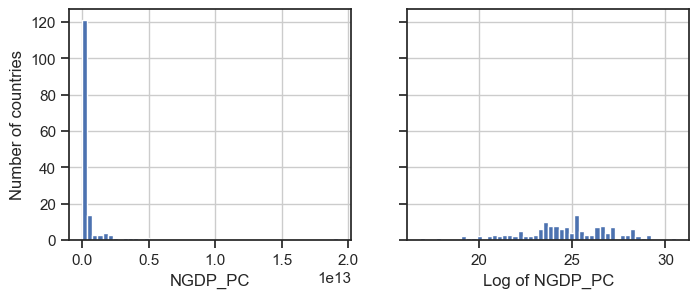

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
metrics["Nominal Gross Domestic Product (in USD)"].hist(ax=axs[0], bins=50)
metrics["Nominal Gross Domestic Product (in USD)"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("NGDP_PC")
axs[1].set_xlabel("Log of NGDP_PC")
axs[0].set_ylabel("Number of countries")
plt.show()

In [57]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(metrics_labels.to_frame())

model = LinearRegression()
model.fit(metrics[["GDP Per capita PPP (in USD)"]], scaled_labels)
some_new_data = metrics[["GDP Per capita PPP (in USD)"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [58]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())

model.fit(metrics[["GDP Per capita PPP (in USD)"]], metrics_labels)

predictions = model.predict(some_new_data)

## 3.4. Custom Transformers

*You will need to write your own for tasks such as custom transformations, cleanup operations, or combining specific attributes.*

In [59]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(metrics[['Nominal Gross Domestic Product (in USD)']])

## 3.5. Transformation Pipelines

*Now let's build a pipeline to preprocess the numerical attributes:*

In [60]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [61]:
num_pipeline

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [62]:
metrics_num_prepared = num_pipeline.fit_transform(metrics_num)
metrics_num_prepared[:2].round(2)

array([[-0.29, -0.28,  0.19,  0.07, -0.61, -0.35],
       [-0.01, -0.1 , -0.39, -0.37,  0.48,  0.3 ]])

In [63]:
df_metrics_num_prepared = pd.DataFrame(
    metrics_num_prepared, 
    columns=num_pipeline.get_feature_names_out(),
    index=metrics_num.index
)

In [64]:
df_metrics_num_prepared.head()

,Population (in millions),Nominal Gross Domestic Product (in USD),Nominal GDP Per capita (in USD),GDP Per capita PPP (in USD),GINI,AREA (in Sq km)
5,-0.294753,-0.280374,0.188535,0.067692,-0.610975,-0.352085
135,-0.007450,-0.102943,-0.388848,-0.367604,0.482214,0.297713
122,-0.239593,-0.271251,-0.645486,-0.706645,1.303132,-0.286368
167,-0.219599,0.276663,3.626505,2.255478,-0.708117,-0.331427
85,-0.125440,-0.106811,-0.139607,0.460995,-1.214349,1.025858


In [65]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Population (in millions)", "Nominal Gross Domestic Product (in USD)", "Nominal GDP Per capita (in USD)", "GDP Per capita PPP (in USD)",
               "GINI", "AREA (in Sq km)"]
cat_attribs = ["IncomeClass"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [66]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
 )

In [67]:
metrics_prepared = preprocessing.fit_transform(metrics)

In [68]:
# shows that we can get a DataFrame out if we want
metrics_prepared_fr = pd.DataFrame(
    metrics_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=metrics.index)
metrics_prepared_fr.head()

,pipeline-1__Population (in millions),pipeline-1__Nominal Gross Domestic Product (in USD),pipeline-1__Nominal GDP Per capita (in USD),pipeline-1__GDP Per capita PPP (in USD),pipeline-1__GINI,pipeline-1__AREA (in Sq km),pipeline-2__IncomeClass_High,pipeline-2__IncomeClass_Low,pipeline-2__IncomeClass_Mid
5,-0.294628,-0.280170,0.187034,0.070506,-0.621977,-0.345490,1.0,0.0,0.0
135,-0.008238,-0.103306,-0.388520,-0.363684,0.473180,0.304433,0.0,0.0,1.0
122,-0.239643,-0.271076,-0.644345,-0.701862,1.295575,-0.279761,0.0,0.0,1.0
167,-0.219712,0.275088,3.614113,2.252730,-0.719293,-0.324828,1.0,0.0,0.0
56,-0.285135,-0.278831,-0.589272,-0.590230,2.446929,-0.336929,0.0,0.0,1.0


In [69]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ('PPP_to_NomGDP', ratio_pipeline(), ["GDP Per capita PPP (in USD)", "Nominal GDP Per capita (in USD)"]),
        ('GINI_to_GDP', ratio_pipeline(), ["GINI", "GDP Per capita PPP (in USD)"]),
        ("log", log_pipeline, ["Population (in millions)", "Nominal Gross Domestic Product (in USD)", "Nominal GDP Per capita (in USD)",
                               "GDP Per capita PPP (in USD)", "AREA (in Sq km)"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # two columns remaining: housing_median_age

In [70]:
metrics_prepared = preprocessing.fit_transform(metrics)
metrics_prepared.shape

(154, 10)

In [71]:
metrics

,Population (in millions),Nominal Gross Domestic Product (in USD),Nominal GDP Per capita (in USD),GDP Per capita PPP (in USD),GINI,AREA (in Sq km),IncomeClass
5,100772.0,2.370000e+09,22630.0,31781.0,32.21,440.00,High
135,34352720.0,3.033000e+11,8814.0,18689.0,40.20,1285216.00,Mid
122,6676948.0,1.784300e+10,2673.0,8492.0,46.20,130375.00,Mid
167,9060598.0,9.471250e+11,104896.0,97581.0,31.50,41285.00,High
56,1236126.0,4.648000e+09,3995.0,11858.0,54.60,17364.00,Mid
...,...,...,...,...,...,...,...
106,4328040.0,1.035700e+10,2337.0,7542.0,32.60,1030000.00,Mid
14,281998.0,6.220000e+09,21442.0,18738.0,NaN,439.00,Mid
92,5364482.0,2.178000e+10,3283.0,11793.0,31.80,10452.00,Mid
179,10643.0,6.300000e+07,6113.0,6076.0,39.00,25.14,Mid


In [72]:
preprocessing.get_feature_names_out()

array(['PPP_to_NomGDP__ratio', 'GINI_to_GDP__ratio',
       'log__Population (in millions)',
       'log__Nominal Gross Domestic Product (in USD)',
       'log__Nominal GDP Per capita (in USD)',
       'log__GDP Per capita PPP (in USD)', 'log__AREA (in Sq km)',
       'cat__IncomeClass_High', 'cat__IncomeClass_Low',
       'cat__IncomeClass_Mid'], dtype=object)

# 4. Select and Train a Model

## 4.1. Training and Evaluating on the Training Set

In [73]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(metrics, metrics_labels)

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('PPP_to_NomGDP', ...), ('GINI_to_GDP', ...), ...]"
,remainder,Pipeline(step...ardScaler())])
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [74]:
metrics_predictions = lin_reg.predict(metrics)
metrics_predictions[:5].round(2) # -2 = rounded to the nearest hundred

array([0.77, 0.75, 0.71, 0.87, 0.7 ])

In [75]:
metrics_labels.iloc[:5].values

array([0.851, 0.794, 0.706, 0.97 , 0.837])

In [76]:
error_ratios = metrics_predictions[:5].round(2) / metrics_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-9.5%, -5.5%, 0.6%, -10.3%, -16.4%


In [77]:
try:
    from sklearn.metrics import root_mean_squared_error
except ImportError:
    from sklearn.metrics import mean_squared_error

    def root_mean_squared_error(labels, predictions):
        return mean_squared_error(labels, predictions, squared=False)

lin_rmse = root_mean_squared_error(metrics_labels, metrics_predictions)
lin_rmse

0.13042527409828522

In [78]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(metrics, metrics_labels)

,steps,"[('columntransformer', ...), ('decisiontreeregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('PPP_to_NomGDP', ...), ('GINI_to_GDP', ...), ...]"
,remainder,Pipeline(step...ardScaler())])
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [79]:
metrics_predictions = tree_reg.predict(metrics)
tree_rmse = root_mean_squared_error(metrics_labels, metrics_predictions)
tree_rmse

0.0

## 4.2. Better Evaluation Using Cross-Validation

In [80]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, metrics, metrics_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [81]:
pd.Series(tree_rmses).describe()

count    10.000000
mean      0.196302
std       0.046565
min       0.098130
25%       0.178429
50%       0.196965
75%       0.216271
max       0.271602
dtype: float64

In [82]:
lin_rmses = -cross_val_score(lin_reg, metrics, metrics_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count    10.000000
mean      0.144933
std       0.061055
min       0.079315
25%       0.101342
50%       0.126818
75%       0.180356
max       0.279208
dtype: float64

In [83]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, metrics, metrics_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [84]:
pd.Series(forest_rmses).describe()

count    10.000000
mean      0.145192
std       0.043004
min       0.093707
25%       0.106122
50%       0.145515
75%       0.186878
max       0.200722
dtype: float64

In [85]:
forest_reg.fit(metrics, metrics_labels)
metrics_predictions = forest_reg.predict(metrics)
forest_rmse = root_mean_squared_error(metrics_labels, metrics_predictions)
forest_rmse

0.052871979149836906

# 5. Fine-Tune Your Model

## 5.1. Grid Search

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
 ])

param_grid = [{
    'random_forest__n_estimators': [100, 200],
    'random_forest__max_depth': [None, 10, 20],
    'random_forest__max_features': ['sqrt', 'log2']}
 ]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(metrics, metrics_labels)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"[{'random_forest__max_depth': [None, 10, ...], 'random_forest__max_features': ['sqrt', 'log2'], 'random_forest__n_estimators': [100, 200]}]"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('PPP_to_NomGDP', ...), ('GINI_to_GDP', ...), ...]"


In [87]:
grid_search.best_params_

{'random_forest__max_depth': 10,
 'random_forest__max_features': 'sqrt',
 'random_forest__n_estimators': 100}

In [88]:
 cv_res = pd.DataFrame(grid_search.cv_results_)
 cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
 [...]  # change column names to fit on this page, and show rmse = -score
 cv_res.head()  # note: the 1st column is the row ID

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__max_features,param_random_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
6,0.097064,0.002153,0.010277,0.000422,10,log2,100,"{'random_forest__max_depth': 10, 'random_fores...",-0.173671,-0.147776,-0.138816,-0.153421,0.014779,1
4,0.097274,0.000902,0.010358,0.000152,10,sqrt,100,"{'random_forest__max_depth': 10, 'random_fores...",-0.173671,-0.147776,-0.138816,-0.153421,0.014779,1
7,0.184438,0.003712,0.015417,0.001833,10,log2,200,"{'random_forest__max_depth': 10, 'random_fores...",-0.174103,-0.147011,-0.140052,-0.153722,0.014689,3
5,0.182982,0.003509,0.014185,0.000253,10,sqrt,200,"{'random_forest__max_depth': 10, 'random_fores...",-0.174103,-0.147011,-0.140052,-0.153722,0.014689,3
8,0.097239,0.001788,0.010263,0.000356,20,sqrt,100,"{'random_forest__max_depth': 20, 'random_fores...",-0.175054,-0.146410,-0.140655,-0.154039,0.015044,5


## 5.2. Randomized Search

In [89]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

Try 30 (n_iter × cv) random combinations of hyperparameters:

In [90]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import loguniform  # for continuous sampling if needed

param_distribs = {
    'random_forest__n_estimators': randint(100, 201),  # 100 to 200 inclusive
    'random_forest__max_depth': [None, 10, 20],        # categorical list
    'random_forest__max_features': ['sqrt', 'log2']    # categorical list
}

rnd_search = RandomizedSearchCV(
    full_pipeline,
    param_distributions=param_distribs,
    n_iter=10,  # number of random combinations to try
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

rnd_search.fit(metrics, metrics_labels)

,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'random_forest__max_depth': [None, 10, ...], 'random_forest__max_features': ['sqrt', 'log2'], 'random_forest__n_estimators': <scipy.stats....00223FF6DD6A0>}"
,n_iter,10
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [91]:
 cv_res = pd.DataFrame(rnd_search.cv_results_)
 cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
 [...]  # change column names to fit on this page, and show rmse = -score
 cv_res.head()  # note: the 1st column is the row ID

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__max_features,param_random_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,0.148874,0.002618,0.012593,0.000297,10,log2,163,"{'random_forest__max_depth': 10, 'random_fores...",-0.174312,-0.147693,-0.138679,-0.153562,0.015127,1
9,0.168705,0.000730,0.013846,0.000481,10,log2,188,"{'random_forest__max_depth': 10, 'random_fores...",-0.174260,-0.147044,-0.140029,-0.153777,0.014764,2
6,0.118229,0.000499,0.011521,0.000663,10,log2,129,"{'random_forest__max_depth': 10, 'random_fores...",-0.173911,-0.148153,-0.139385,-0.153816,0.014653,3
0,0.201414,0.034454,0.016605,0.001255,20,log2,192,"{'random_forest__max_depth': 20, 'random_fores...",-0.173941,-0.145966,-0.142463,-0.154123,0.014086,4
8,0.158464,0.001226,0.012984,0.000199,None,sqrt,175,"{'random_forest__max_depth': None, 'random_for...",-0.174276,-0.146138,-0.142099,-0.154171,0.014312,5


**Bonus section: how to choose the sampling distribution for a hyperparameter**

* `scipy.stats.randint(a, b+1)`: for hyperparameters with _discrete_ values that range from a to b, and all values in that range seem equally likely.
* `scipy.stats.uniform(a, b)`: this is very similar, but for _continuous_ hyperparameters.
* `scipy.stats.geom(1 / scale)`: for discrete values, when you want to sample roughly in a given scale. E.g., with scale=1000 most samples will be in this ballpark, but ~10% of all samples will be <100 and ~10% will be >2300.
* `scipy.stats.expon(scale)`: this is the continuous equivalent of `geom`. Just set `scale` to the most likely value.
* `scipy.stats.loguniform(a, b)`: when you have almost no idea what the optimal hyperparameter value's scale is. If you set a=0.01 and b=100, then you're just as likely to sample a value between 0.01 and 0.1 as a value between 10 and 100.


Here are plots of the probability mass functions (for discrete variables), and probability density functions (for continuous variables) for `randint()`, `uniform()`, `geom()` and `expon()`:

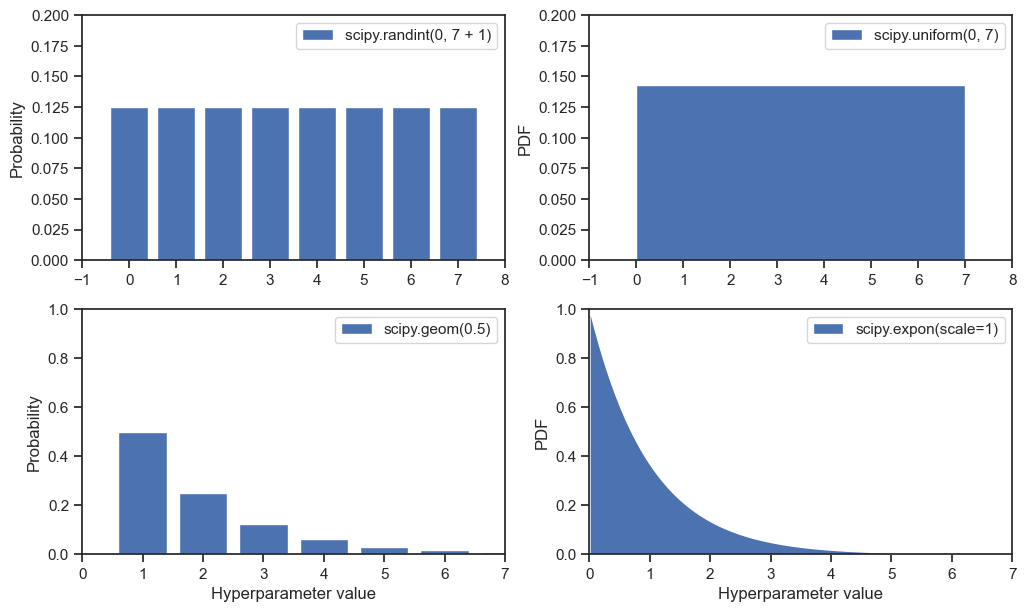

In [92]:
# extra code – plots a few distributions you can use in randomized search

from scipy.stats import randint, uniform, geom, expon

xs1 = np.arange(0, 7 + 1)
randint_distrib = randint(0, 7 + 1).pmf(xs1)

xs2 = np.linspace(0, 7, 500)
uniform_distrib = uniform(0, 7).pdf(xs2)

xs3 = np.arange(0, 7 + 1)
geom_distrib = geom(0.5).pmf(xs3)

xs4 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.bar(xs1, randint_distrib, label="scipy.randint(0, 7 + 1)")
plt.ylabel("Probability")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 2)
plt.fill_between(xs2, uniform_distrib, label="scipy.uniform(0, 7)")
plt.ylabel("PDF")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 3)
plt.bar(xs3, geom_distrib, label="scipy.geom(0.5)")
plt.xlabel("Hyperparameter value")
plt.ylabel("Probability")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 4)
plt.fill_between(xs4, expon_distrib, label="scipy.expon(scale=1)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.show()

Here are the PDF for `expon()` and `loguniform()` (left column), as well as the PDF of log(X) (right column). The right column shows the distribution of hyperparameter _scales_. You can see that `expon()` favors hyperparameters with roughly the desired scale, with a longer tail towards the smaller scales. But `loguniform()` does not favor any scale, they are all equally likely:

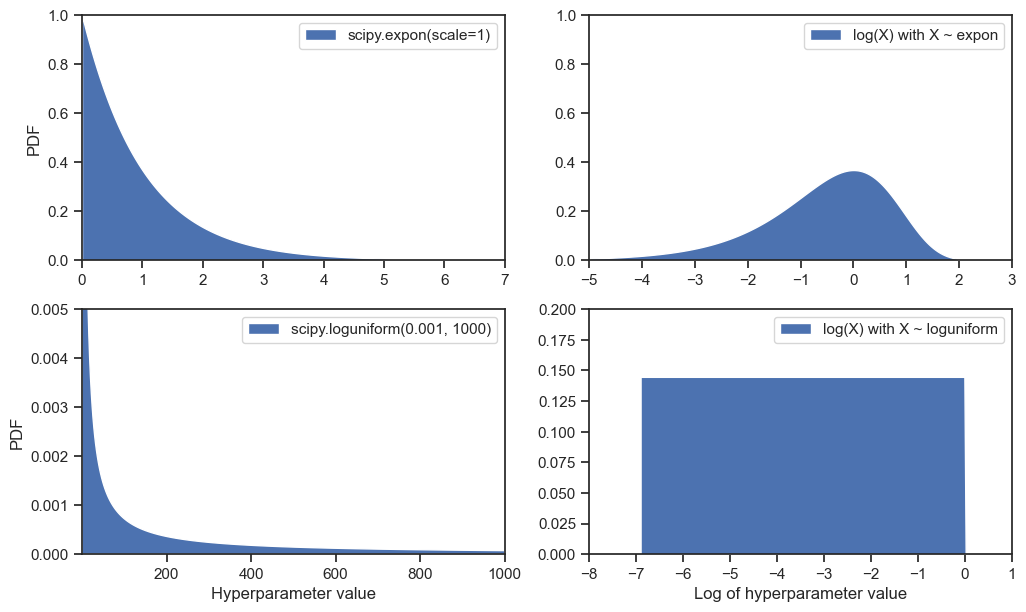

In [93]:
# extra code – shows the difference between expon and loguniform

from scipy.stats import loguniform

xs1 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs1)

log_xs2 = np.linspace(-5, 3, 500)
log_expon_distrib = np.exp(log_xs2 - np.exp(log_xs2))

xs3 = np.linspace(0.001, 1000, 500)
loguniform_distrib = loguniform(0.001, 1000).pdf(xs3)

log_xs4 = np.linspace(np.log(0.001), np.log(1000), 500)
log_loguniform_distrib = uniform(np.log(0.001), np.log(1000)).pdf(log_xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.fill_between(xs1, expon_distrib,
                 label="scipy.expon(scale=1)")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 2)
plt.fill_between(log_xs2, log_expon_distrib,
                 label="log(X) with X ~ expon")
plt.legend()
plt.axis([-5, 3, 0, 1])

plt.subplot(2, 2, 3)
plt.fill_between(xs3, loguniform_distrib,
                 label="scipy.loguniform(0.001, 1000)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0.001, 1000, 0, 0.005])

plt.subplot(2, 2, 4)
plt.fill_between(log_xs4, log_loguniform_distrib,
                 label="log(X) with X ~ loguniform")
plt.xlabel("Log of hyperparameter value")
plt.legend()
plt.axis([-8, 1, 0, 0.2])

plt.show()

## 5.3. Analyze the Best Models and Their Errors

In [94]:
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.12, 0.14, 0.1 , 0.13, 0.17, 0.18, 0.12, 0.01, 0.02, 0.01])

In [95]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(np.float64(0.18220224876542382), 'log__GDP Per capita PPP (in USD)'),
 (np.float64(0.1680713904902335), 'log__Nominal GDP Per capita (in USD)'),
 (np.float64(0.14373165956113093), 'GINI_to_GDP__ratio'),
 (np.float64(0.13426037411977296),
  'log__Nominal Gross Domestic Product (in USD)'),
 (np.float64(0.11833192091796287), 'PPP_to_NomGDP__ratio'),
 (np.float64(0.11832436705286167), 'log__AREA (in Sq km)'),
 (np.float64(0.09794143212559202), 'log__Population (in millions)'),
 (np.float64(0.018242387756014777), 'cat__IncomeClass_Low'),
 (np.float64(0.011831964276309977), 'cat__IncomeClass_High'),
 (np.float64(0.00706225493469761), 'cat__IncomeClass_Mid')]

## 5.4 Evaluate Your System on the Test Set

In [96]:
X_test = test_set.drop("Human Development Index (HDI)", axis=1)
y_test = test_set["Human Development Index (HDI)"].copy()

In [97]:
# Add categorical Feature to Test set
X_test['IncomeClass'] = X_test['GDP Per capita PPP (in USD)'].apply(
    lambda x: 'Low' if x < 5000 else 'Mid' if x < 20000 else 'High'
)

X_test.head(5)

,Population (in millions),Nominal Gross Domestic Product (in USD),Nominal GDP Per capita (in USD),GDP Per capita PPP (in USD),GINI,AREA (in Sq km),IncomeClass
138,10639726.0,3.214400e+11,30002.0,50037.0,31.9,92230.0,High
16,11812354.0,6.893640e+11,58248.0,75187.0,24.9,30689.0,High
155,5419451.0,1.524800e+11,28180.0,47440.0,21.2,49035.0,High
96,41232.0,7.365000e+09,187267.0,98432.0,NaN,160.5,High
68,13986179.0,2.320500e+10,1542.0,3241.0,33.7,245857.0,Low


In [98]:
# Remove nan fields:
# Assuming your DataFrame is called df
rows_with_nan = y_test[y_test.isnull()].index
rows_with_nan

Index([111], dtype='int64')

In [99]:
y_test_clean = y_test.copy()

y_test_clean.dropna(inplace=True)

y_test_clean.loc[y_test.isnull()].head()

Series([], Name: Human Development Index (HDI), dtype: float64)

In [100]:
rows_with_nan = X_test[X_test.isnull().any(axis=1)]
rows_with_nan

,Population (in millions),Nominal Gross Domestic Product (in USD),Nominal GDP Per capita (in USD),GDP Per capita PPP (in USD),GINI,AREA (in Sq km),IncomeClass
96,41232.0,7.365000e+09,187267.0,98432.0,NaN,160.50,High
111,38423.0,8.784000e+09,240862.0,115700.0,NaN,2.08,High
66,114621.0,1.300000e+09,11437.0,20195.0,NaN,344.00,High
118,11919.0,1.500000e+08,10125.0,9995.0,NaN,21.00,Mid
24,460345.0,1.578300e+10,35813.0,76864.0,NaN,5765.00,High


In [101]:
X_test_clean = X_test.copy()

X_test_clean.drop([111], inplace=True)

X_test_clean

,Population (in millions),Nominal Gross Domestic Product (in USD),Nominal GDP Per capita (in USD),GDP Per capita PPP (in USD),GINI,AREA (in Sq km),IncomeClass
138,1.063973e+07,3.214400e+11,30002.0,50037.0,31.9,92230.0,High
16,1.181235e+07,6.893640e+11,58248.0,75187.0,24.9,30689.0,High
155,5.419451e+06,1.524800e+11,28180.0,47440.0,21.2,49035.0,High
96,4.123200e+04,7.365000e+09,187267.0,98432.0,NaN,160.5,High
68,1.398618e+07,2.320500e+10,1542.0,3241.0,33.7,245857.0,Low
153,8.460512e+06,8.390000e+09,916.0,3550.0,33.7,73252.0,Low
55,1.373101e+06,4.348600e+10,31854.0,45122.0,30.6,45335.0,High
15,9.109280e+06,6.886400e+10,7477.0,24016.0,25.3,207595.0,High
112,3.504741e+06,1.878200e+10,5348.0,15087.0,32.7,1564116.0,Mid
184,3.401110e+08,3.050700e+13,89105.0,89105.0,41.6,3796742.0,High


In [102]:
rows_with_nan = X_test_clean[X_test_clean.isnull().any(axis=1)]
rows_with_nan

,Population (in millions),Nominal Gross Domestic Product (in USD),Nominal GDP Per capita (in USD),GDP Per capita PPP (in USD),GINI,AREA (in Sq km),IncomeClass
96,41232.0,7.365000e+09,187267.0,98432.0,NaN,160.5,High
66,114621.0,1.300000e+09,11437.0,20195.0,NaN,344.0,High
118,11919.0,1.500000e+08,10125.0,9995.0,NaN,21.0,Mid
24,460345.0,1.578300e+10,35813.0,76864.0,NaN,5765.0,High


In [103]:
X_test_prepared = preprocessing.fit_transform(X_test_clean)
X_test_prepared.shape

(38, 10)

In [104]:
preprocessing.get_feature_names_out()

array(['PPP_to_NomGDP__ratio', 'GINI_to_GDP__ratio',
       'log__Population (in millions)',
       'log__Nominal Gross Domestic Product (in USD)',
       'log__Nominal GDP Per capita (in USD)',
       'log__GDP Per capita PPP (in USD)', 'log__AREA (in Sq km)',
       'cat__IncomeClass_High', 'cat__IncomeClass_Low',
       'cat__IncomeClass_Mid'], dtype=object)

In [105]:
final_predictions = final_model.predict(X_test_clean)

final_rmse = root_mean_squared_error(y_test_clean, final_predictions)
final_rmse

0.1734420982015251

In [106]:
from scipy import stats

def rmse(squared_errors):
    return np.sqrt(np.mean(squared_errors))

confidence = 0.95
squared_errors = (final_predictions - y_test_clean) ** 2
boot_result = stats.bootstrap([squared_errors], rmse,
                              confidence_level=confidence, random_state=42)
rmse_lower, rmse_upper = boot_result.confidence_interval

In [107]:
rmse_lower, rmse_upper

(np.float64(0.12463066366895138), np.float64(0.28917532727705014))

## 5.5. Model persistence using joblib

In [108]:
import joblib

joblib.dump(final_model, "my_global_HDI_model.pkl")

['my_global_HDI_model.pkl']

Now you can deploy this model to production. For example, the following code could be a script that would run in production:

In [109]:
import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_global_HDI_model.pkl")

new_data = metrics.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

In [110]:
predictions

array([0.80617758, 0.80393561, 0.72707736, 0.90651709, 0.76556048])

In [116]:
metrics.iloc[:5]

,Population (in millions),Nominal Gross Domestic Product (in USD),Nominal GDP Per capita (in USD),GDP Per capita PPP (in USD),GINI,AREA (in Sq km),IncomeClass
5,100772.0,2.370000e+09,22630.0,31781.0,32.21,440.0,High
135,34352720.0,3.033000e+11,8814.0,18689.0,40.20,1285216.0,Mid
122,6676948.0,1.784300e+10,2673.0,8492.0,46.20,130375.0,Mid
167,9060598.0,9.471250e+11,104896.0,97581.0,31.50,41285.0,High
56,1236126.0,4.648000e+09,3995.0,11858.0,54.60,17364.0,Mid


In [117]:
metrics_labels.head(5)

5      0.851
135    0.794
122    0.706
167    0.970
85     0.837
Name: Human Development Index (HDI), dtype: float64